##  逻辑回归

用于解决二分类问题

通过计算某一事件发生的概率进行分类

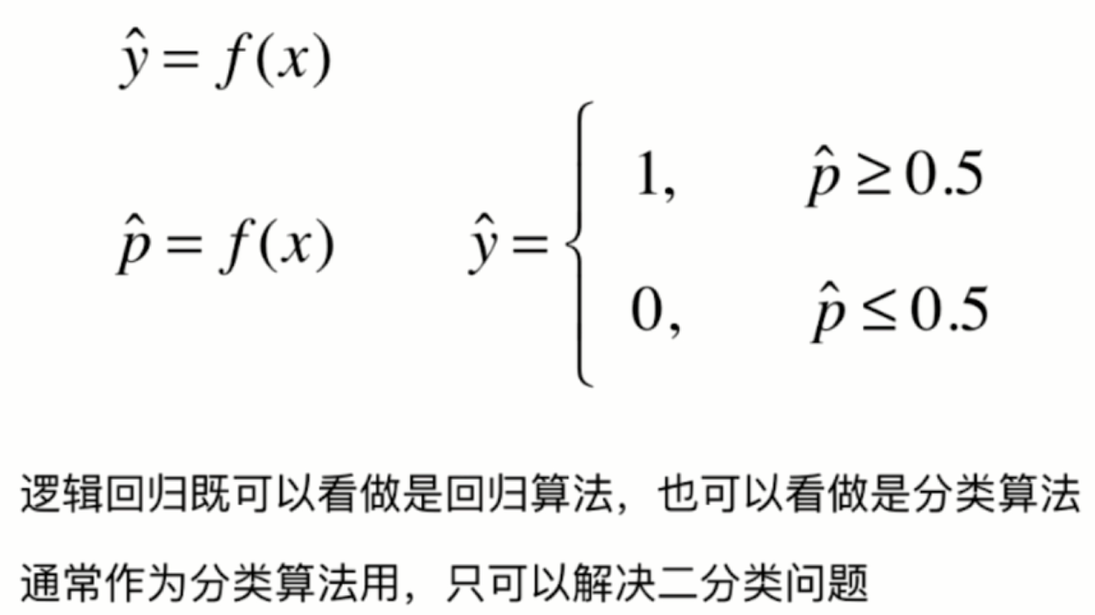   </img>

## Sigmoid 函数

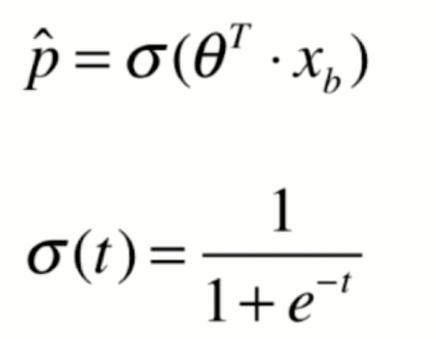   </img>

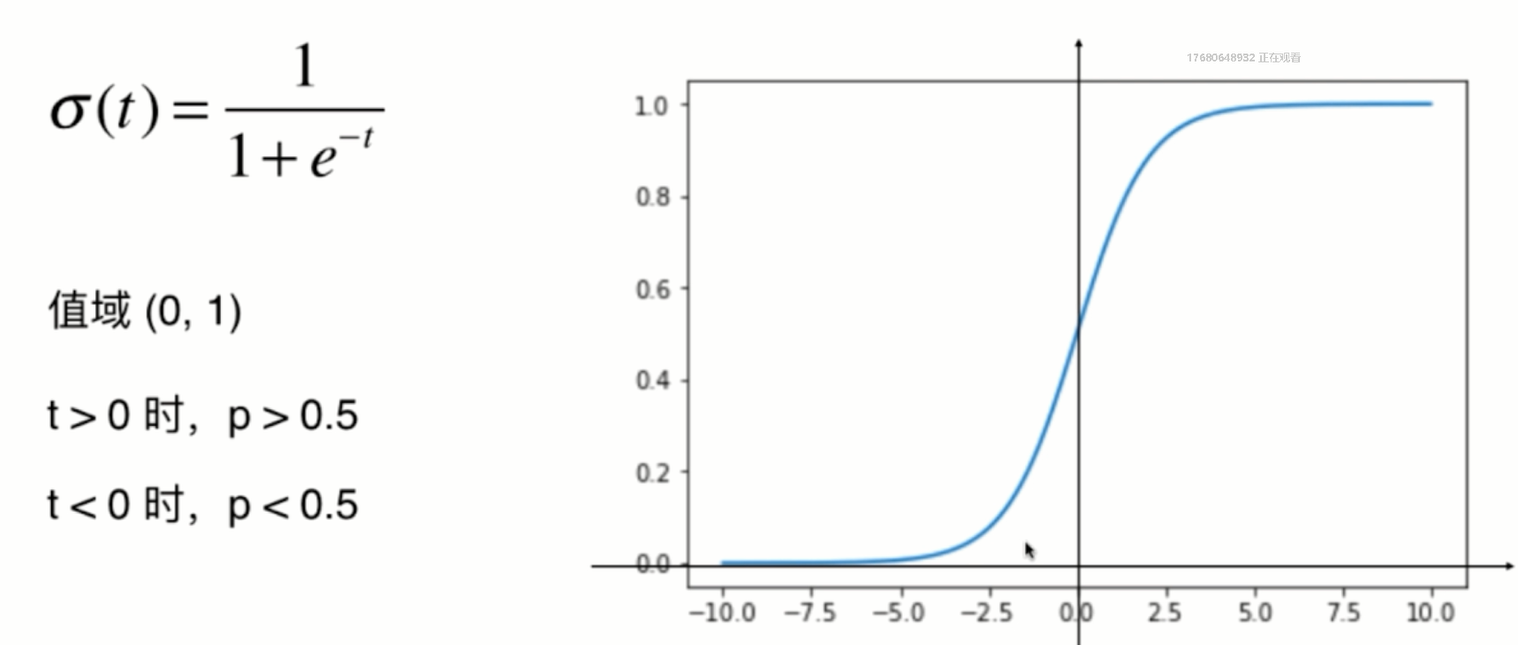   </img>

 ## 损失函数

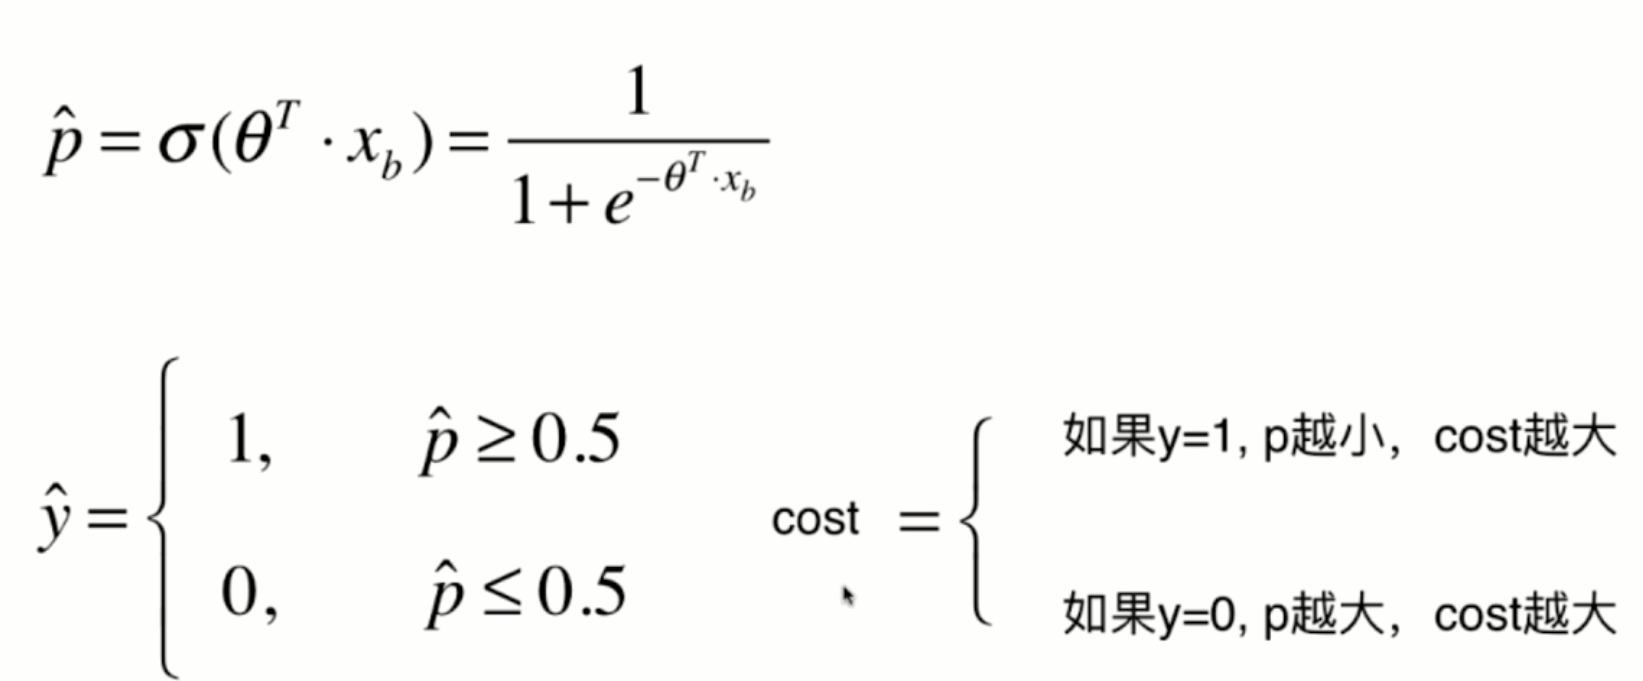   </img>

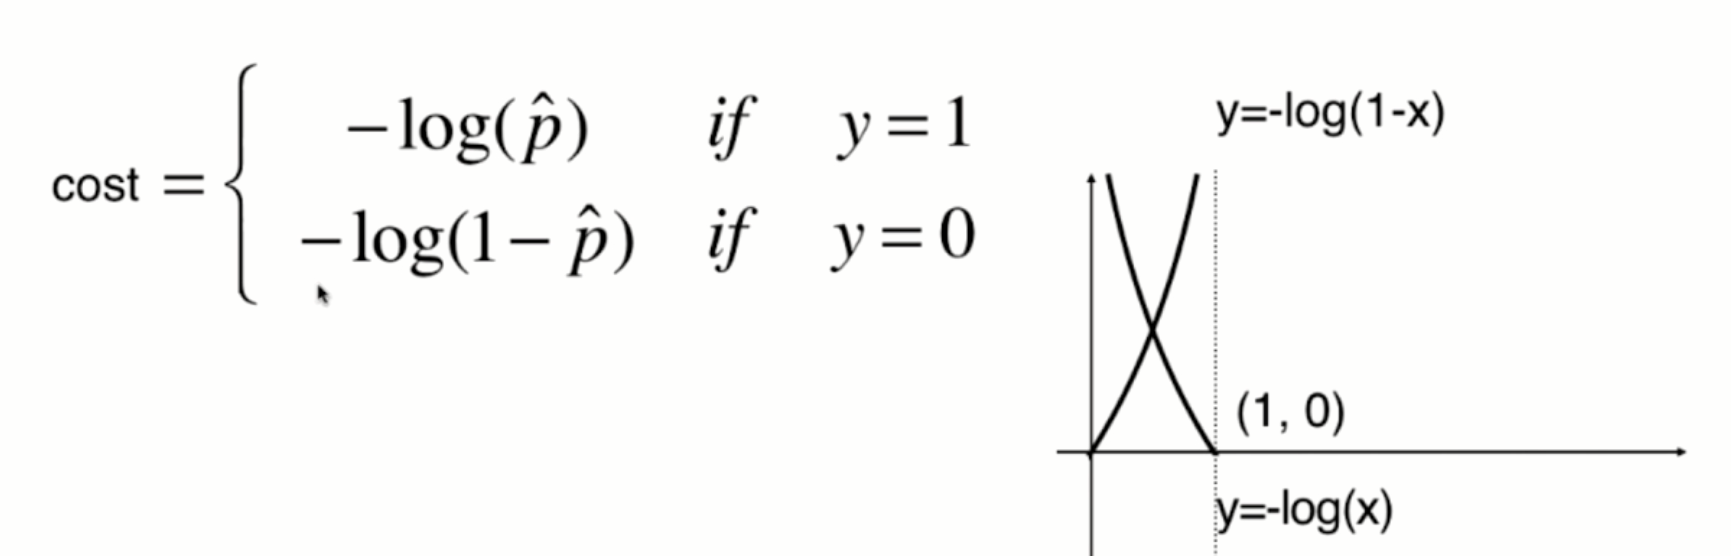

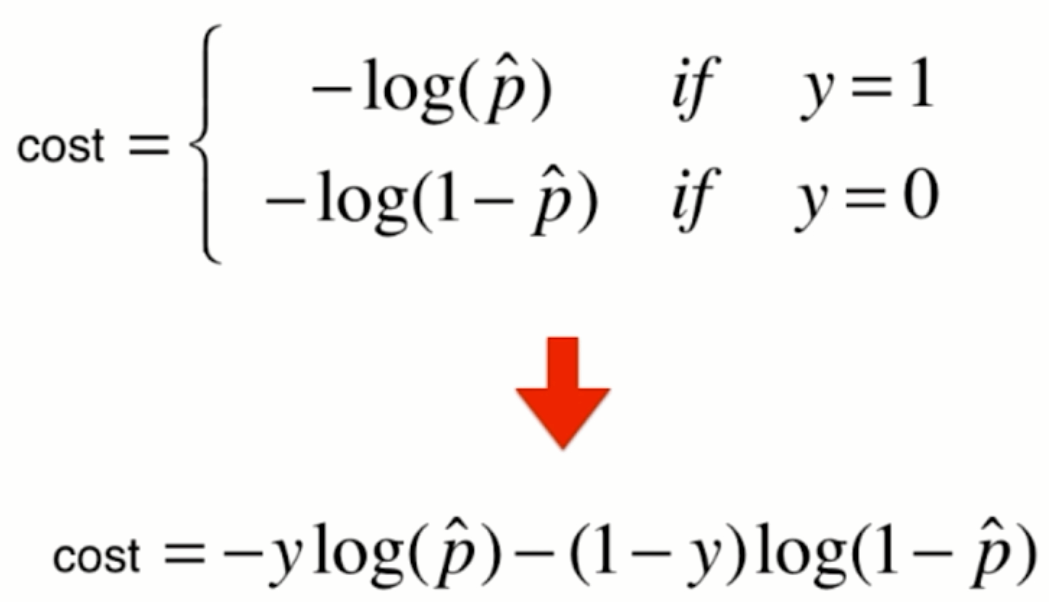   </img>

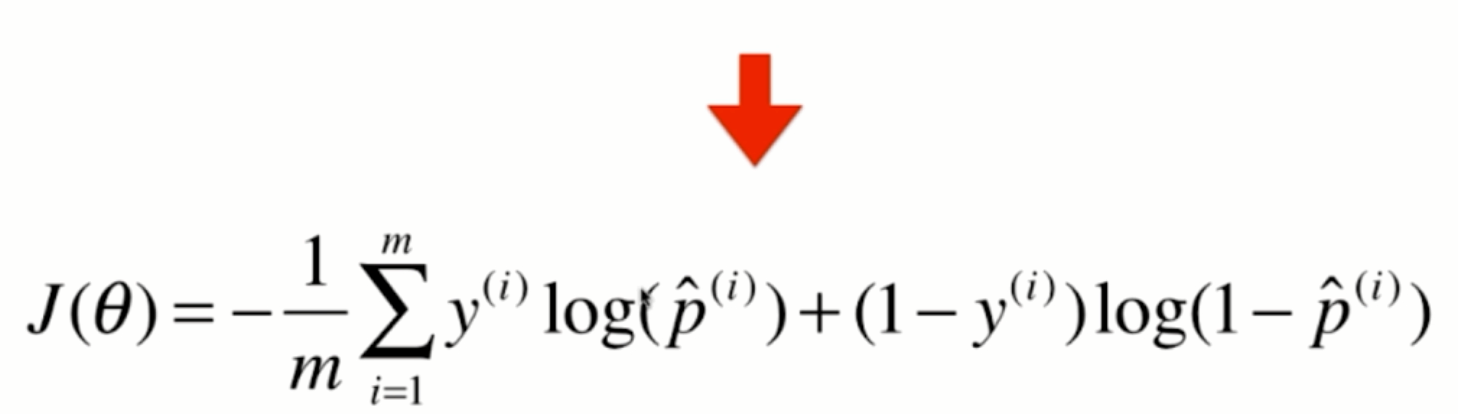   </img>

**使用梯度下降**   **与线性回归十分相似**

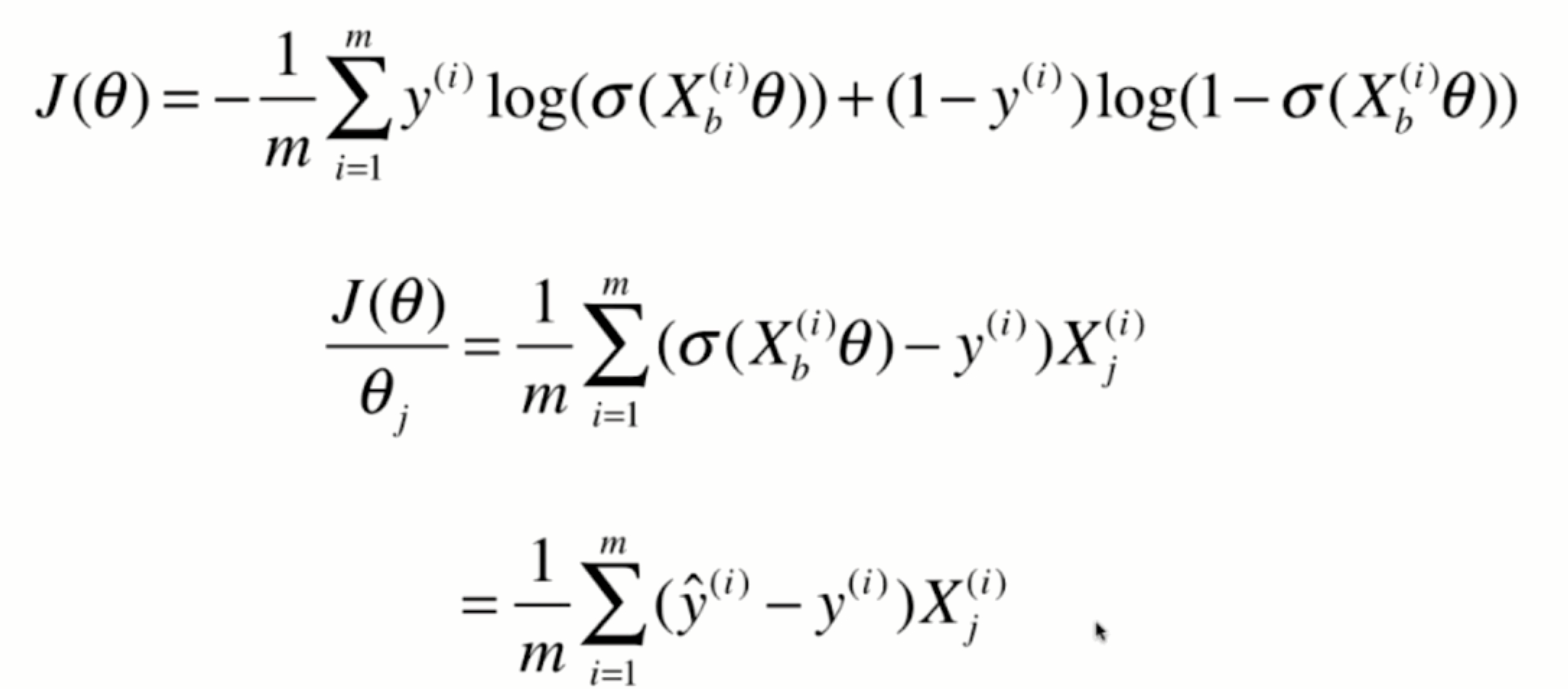   </img>

### 交叉熵

描述两种分布的差异

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

x = iris.data
y = iris.target

X = x[y<2 , :2]
y = y[y<2]

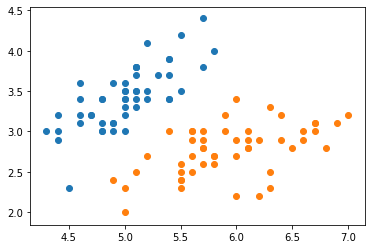

In [3]:
plt.scatter(X[y==0 , 0] , X[y==0 , 1])
plt.scatter(X[y==1 , 0] , X[y==1 , 1])
plt.show()

In [4]:
class Log_Reg():
    def __init__(self):
        self.a = None 
        self.b = None
        self.coef_ = None              #特征权重向量
        self.interception_ = None  #截距
        self.theta = None
    


    def sigmoid(self , t):
        return 1 / (1 + np.exp(-t))

    def fit(self, X_train, y_train, eta=0.01, n_iters=1e4):

        def J(theta, X_b, y):
            try:
                return - np.sum(-y * np.log( self.sigmoid(X_b.dot(theta)) ) - (1-y) * np.log( self.sigmoid(X_b.dot(theta) ))) / len(y)
            except:
                return float('inf')
            
        def dJ(theta, X_b, y):
            return X_b.T.dot( self.sigmoid(X_b.dot(theta)) - y) / len(y)

        def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):

            theta = initial_theta
            cur_iter = 0

            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient

                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break

                cur_iter += 1

            return theta

        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self.theta = gradient_descent(X_b, y_train, initial_theta, eta, n_iters)

        self.intercept_ = self.theta[0]
        self.coef_ = self.theta[1:]

        return self
        
            
    def predict_proba(self, X_predict):

        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self.sigmoid(X_b.dot(self.theta))
    
    def predict(self, X_predict):

        proba = self.predict_proba(X_predict)
        return np.array(proba >= 0.5, dtype='int')
    
    def MSE(self,y_ture,y_predict):
        return np.sum((y_ture - y_predict)**2) / len(y_ture)
    
    def RMSE(self,y_ture,y_predict):
        return np.sqrt(np.sum((y_ture - y_predict)**2) / len(y_ture))
    
    def MAE(self,y_ture,y_predict):
        return np.sum(np.abs(y_ture - y_predict)) / len(y_ture)
    
    def R_square(self,y_ture,y_predict):
        return 1 - self.MSE(y_ture,y_predict) / np.var(y_ture)
    
    def score(self,x_test,y_test):
        y_predict = self.predict_proba(x_test)
        return self.R_square(y_test , y_predict)
    
    def accuracy_score(self,x_test,y_test):
        y_predict = self.predict(x_test)
        return np.sum(y_test == y_predict) / len(y_test)

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 666)

In [6]:
log_reg = Log_Reg()
log_reg.fit(X_train , y_train)

In [7]:
log_reg.accuracy_score(X_test , y_test)         #准确率

1.0

## 决策边界

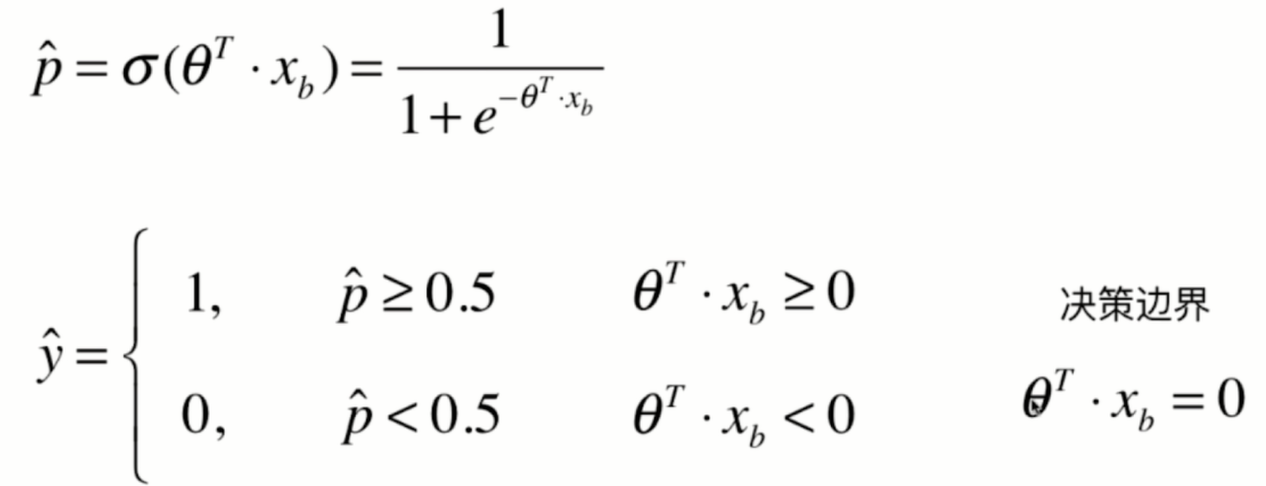   </img>

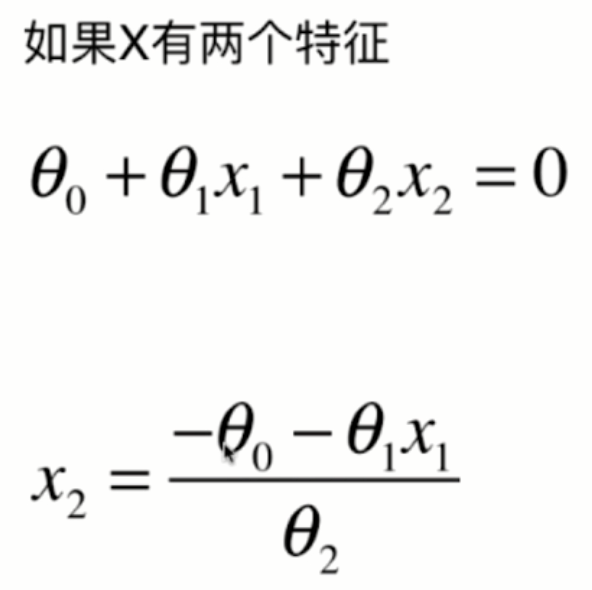   </img>

In [8]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)
    


In [9]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.intercept_) / log_reg.coef_[1]

In [10]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

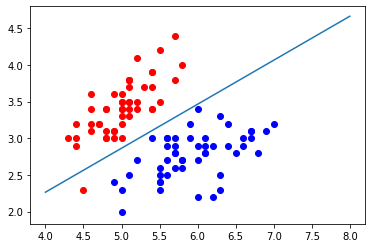

In [11]:
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

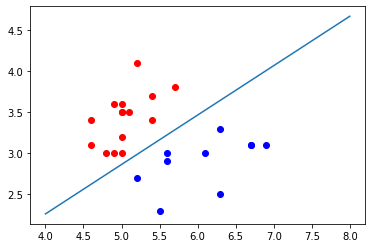

In [12]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

## 多项式项

In [13]:
np.random.seed(666)
X = np.random.normal(0 , 1 , size =(200,2))
y = np.array( X[:,0]**2  +X[:,1]**2<1.5  , dtype = 'int' )

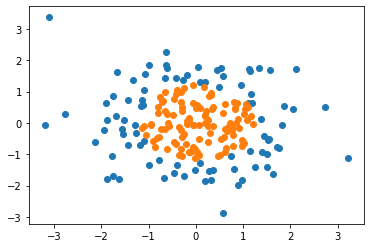

In [14]:
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression 

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
log_reg.score(X,y)

0.605

可视化决策边界

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


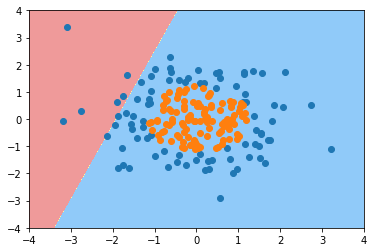

In [18]:
plot_decision_boundary(log_reg , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

**使用pipeline，加上多项式**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [20]:
def LogisticPolyRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LogisticRegression())
    ])

In [21]:
log_reg_poly = LogisticPolyRegression(2)

In [22]:
log_reg_poly.fit(X,y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [23]:
log_reg_poly.score(X,y)

0.96

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


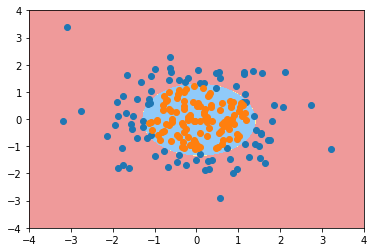

In [24]:
plot_decision_boundary(log_reg_poly , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

## 正则项

**sklearn中LogisticRegression已经封装好了正则项，但是与之前所说的有点不同，其惩罚系数是在损失函数上的**

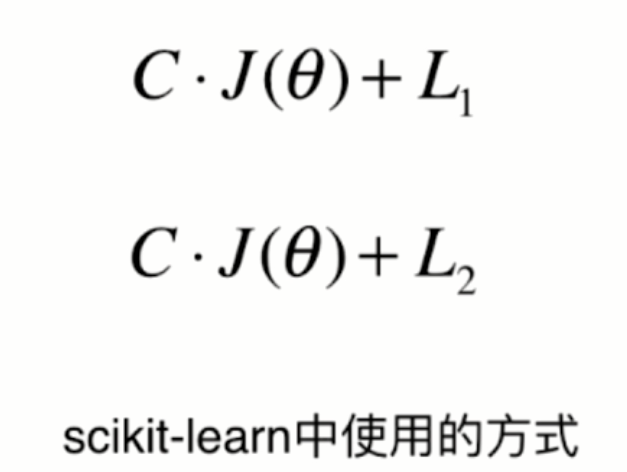

抛物线数据

In [25]:
np.random.seed(666)
X = np.random.normal(0 , 1 , size =(200,2))
y = np.array( X[:,0]**2  +X[:,1]<1.5  , dtype = 'int' )

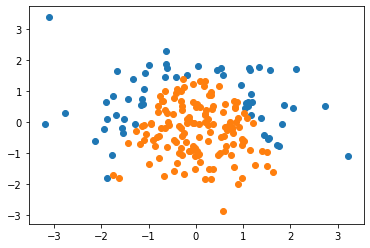

In [26]:
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y)

In [28]:
log_reg2 = LogisticRegression()

In [29]:
log_reg2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
log_reg2.score(X_test,y_test)

0.78

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


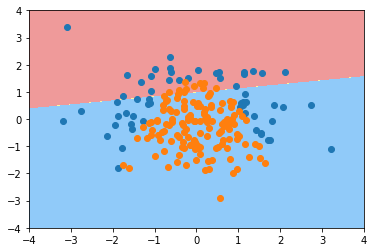

In [31]:
plot_decision_boundary(log_reg2 , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

**加入正则项和多项式**

In [34]:
def LogisticPolyRegression(degree , C=1):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LogisticRegression(C = C))
    ])

In [51]:
log_reg2 = LogisticPolyRegression(20 , C=1)

In [52]:
log_reg2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [53]:
log_reg2.score(X_test , y_test)

0.94

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


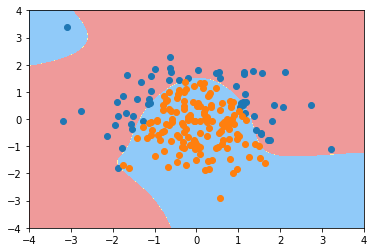

In [54]:
plot_decision_boundary(log_reg2 , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

C传入0.1，使正则化项起更大作用

In [63]:
log_reg2 = LogisticPolyRegression(20 , C=0.1)

In [64]:
log_reg2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [65]:
log_reg2.score(X_test , y_test)

0.92

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


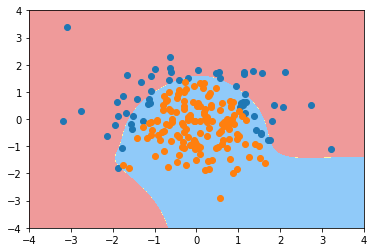

In [66]:
plot_decision_boundary(log_reg2 , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

换成L1正则项

In [76]:
def LogisticPolyRegression(degree , C=1 , penalty='l2'  ,solver='liblinear'):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LogisticRegression(C = C , penalty = penalty , solver=solver))
    ])

In [81]:
log_reg3 = LogisticPolyRegression(20 , 0.1 , penalty='l1')

In [82]:
log_reg3.fit(X_train , y_train)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=20, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LogisticRegression(C=0.1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [83]:
log_reg3.score(X_test,y_test)

0.98

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


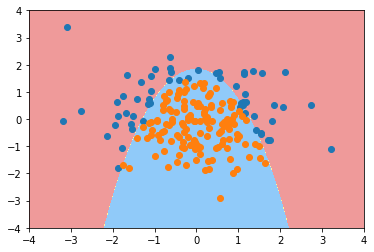

In [84]:
plot_decision_boundary(log_reg3 , [-4,4,-4,4])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.show()

## 多分类

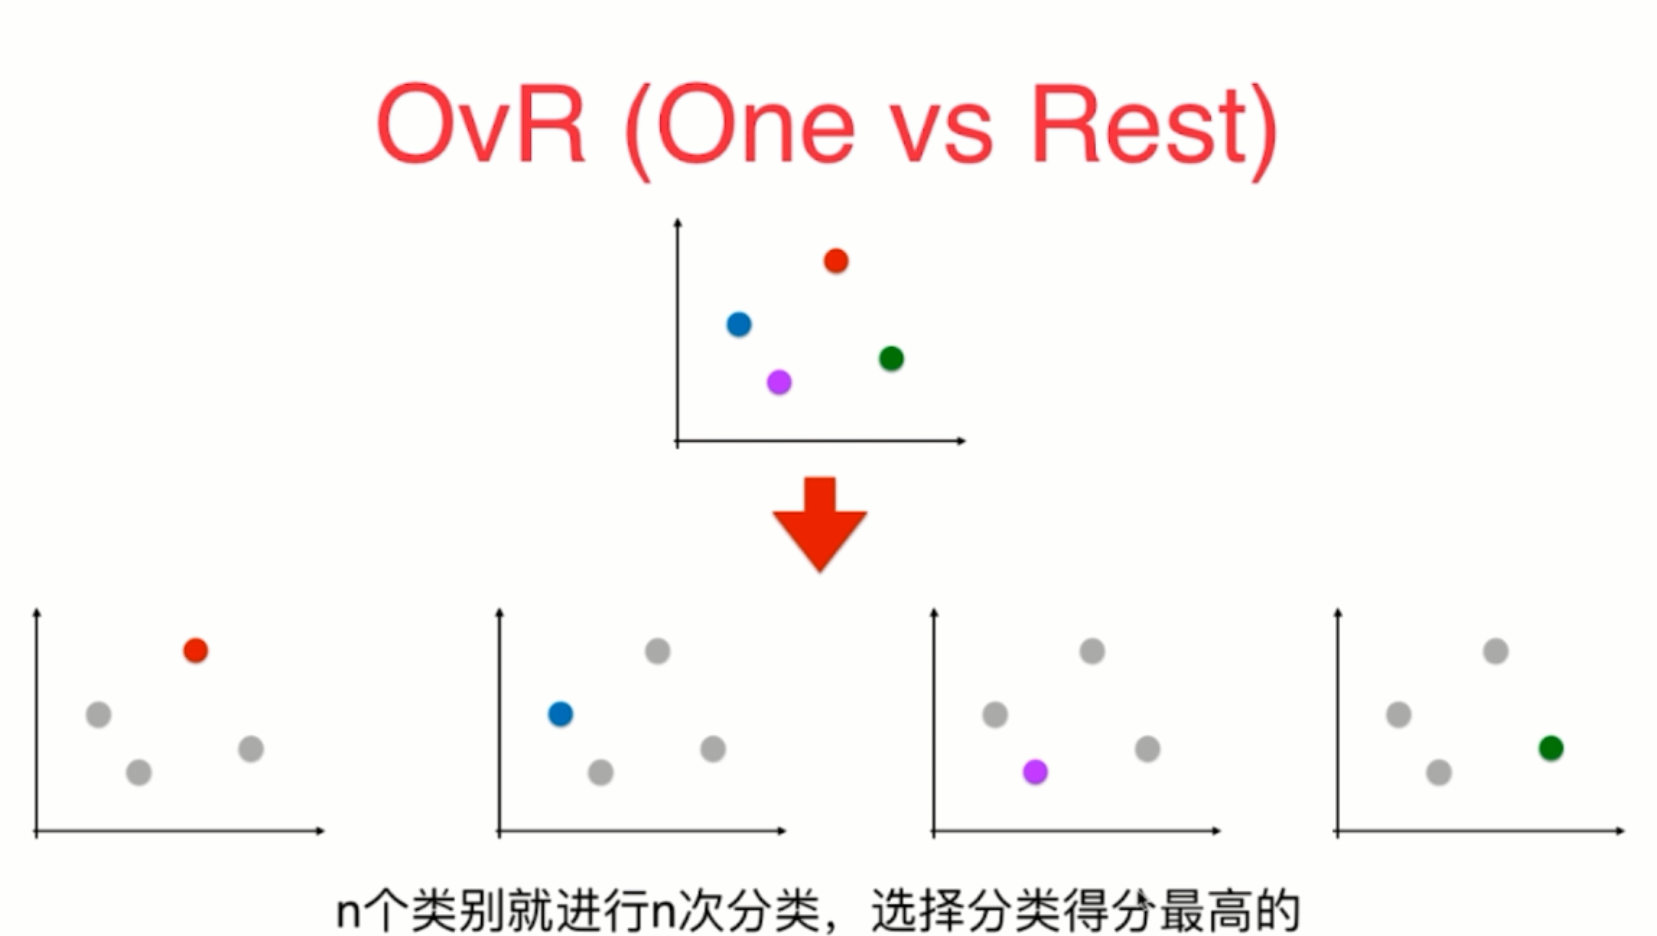

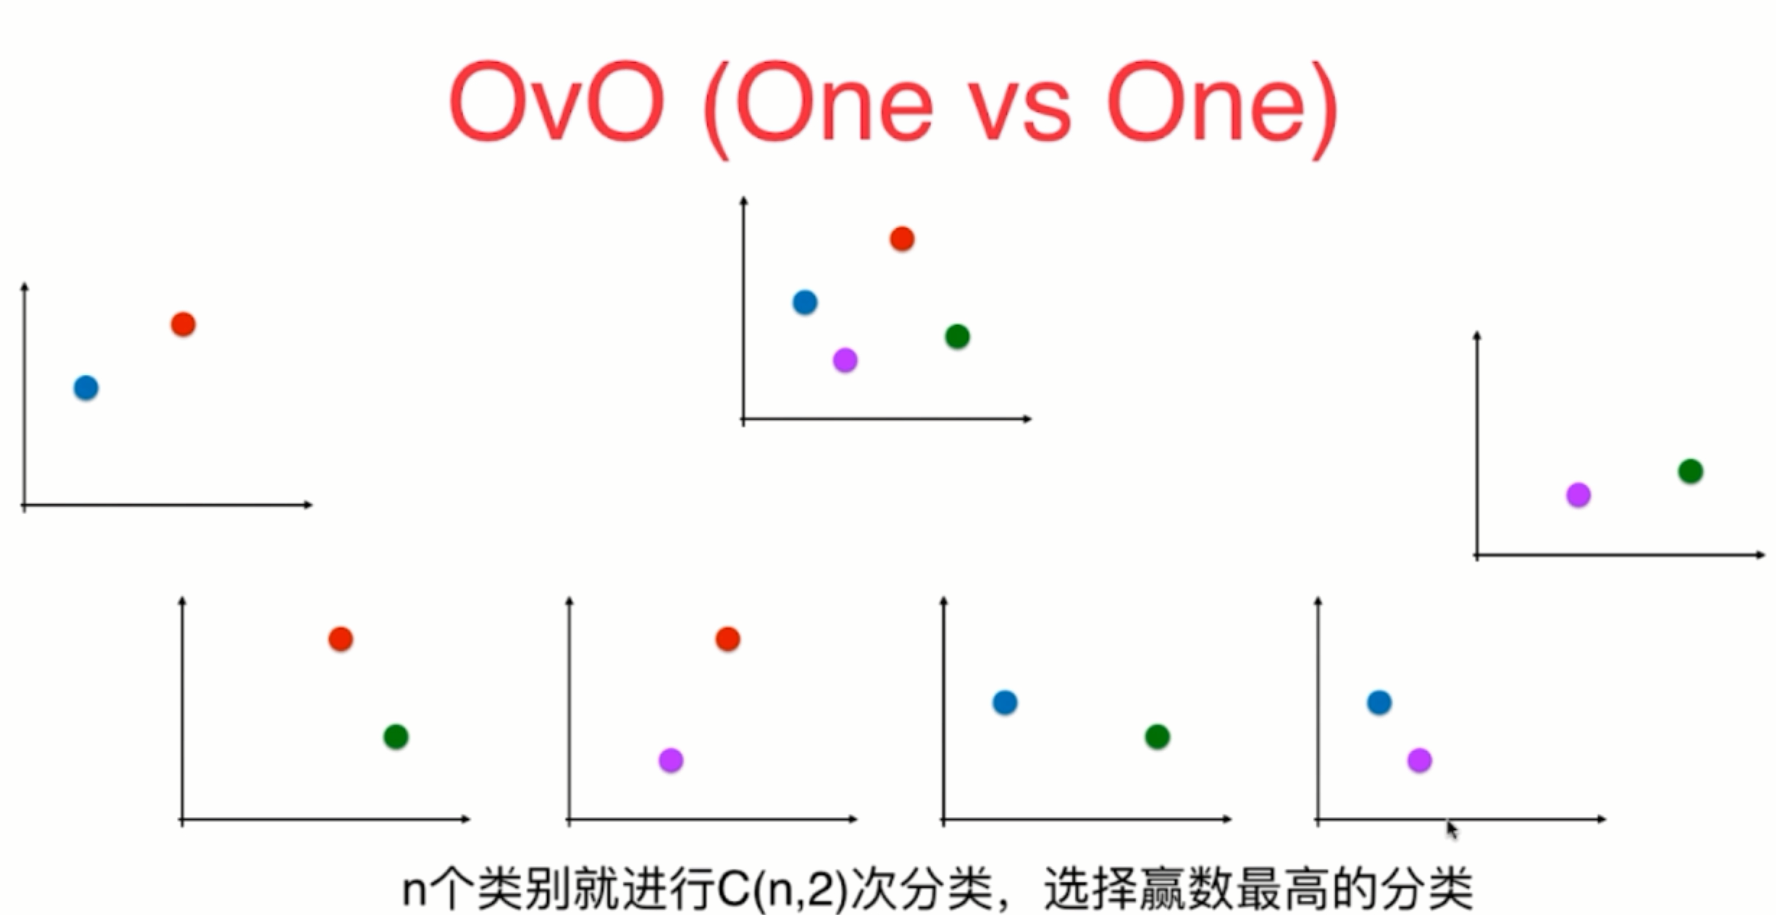

**OvO 准确率高，耗时长**

**OvR 准确率低，耗时短**

In [85]:
from sklearn import datasets

In [88]:
iris = datasets.load_iris()
X = iris.data[: , :2]
y = iris.target

In [90]:
X_train , X_test , y_train , y_test = train_test_split(X,y)

OvR

In [122]:
log_reg3 = LogisticRegression( multi_class='ovr' , solver='liblinear')

In [123]:
log_reg3.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
log_reg3.score(X_test , y_test)

0.8157894736842105

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


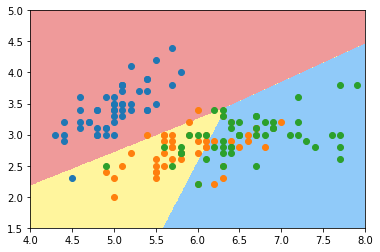

In [125]:
plot_decision_boundary(log_reg3 , [4,8,1.5,5])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.scatter( X[y==2 , 0] , X[y==2 , 1])
plt.show()

OvO

In [130]:
log_reg3 = LogisticRegression( multi_class='multinomial' , solver='newton-cg')

In [131]:
log_reg3.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
log_reg3.score(X_test , y_test)

0.8421052631578947

C:\Users\hyh\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


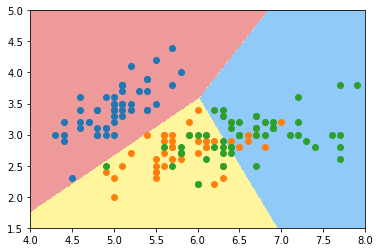

In [133]:
plot_decision_boundary(log_reg3 , [4,8,1.5,5])
plt.scatter( X[y==0 , 0] , X[y==0 , 1])
plt.scatter( X[y==1 , 0] , X[y==1 , 1])
plt.scatter( X[y==2 , 0] , X[y==2 , 1])
plt.show()

一般不用选择，默认是自动，直接用就可以了

手写数字数据集

In [134]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [135]:
X_train , X_test , y_train , y_test = train_test_split(X,y)

In [136]:
def LogisticPolyRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LogisticRegression())
    ])

In [137]:
log_reg4 = LogisticPolyRegression(1)

In [140]:
log_reg4.fit(X_train , y_train)
log_reg4.score(X_train , y_train)

0.9985152190051967

In [139]:
log_reg4.score(X_test , y_test)

0.98